# **Music Recommendation System**

# **Milestone 1**

## **Problem Definition**

**The context** - Why is this problem important to solve?<br>
**The objectives** - What is the intended goal?<br>
**The key questions** - What are the key questions that need to be answered?<br>
**The problem formulation** - What is it that we are trying to solve using data science?

With the advent of technology, societies have become more efficient with their lives. At the same time, however, individual human lives have also become more fast-paced and distracted, leaving little time to explore artistic pursuits. Also, technology has made significant advancements in the ability to coexist with art and general entertainment. It has in fact made it easier for humans with a shortage of time to find and consume good content. Almost every internet-based company's revenue relies on the time consumers spend on its platform. These companies need to be able to figure out what kind of content is needed in order to increase customer time spent and make their experience better. Therefore, one of the key challenges for these companies is figuring out what kind of content their customers are most likely to consume. Spotify is one such audio content provider with a huge market base across the world. With the ever-increasing volume of songs becoming available on the Internet, searching for songs of interest has become a tedious task in itself. However, Spotify has grown significantly in the market because of its ability to recommend the ‘best’ next song to each and every customer based on a huge preference database gathered over time - millions of customers and billions of songs. This is done by using smart recommendation systems that can recommend songs based on users’ likes/dislikes.


Our objective is to build a recommendation system to propose the top 10 songs for a user based on the likelihood of
listening to those songs.


## **Data Dictionary**

The core data is the Taste Profile Subset released by The Echo Nest as part of the Million Song Dataset. There are two files in this dataset. One contains the details about the song id, titles, release, artist name and the year of release. Second file contains the user id, song id and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Importing Libraries and the Dataset**

In [158]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse.linalg import svds
import random
import scipy

In [2]:
count_df = pd.read_csv('count_data.csv')
song_df = pd.read_csv('song_data.csv')

### **Overview of the Data**

### **Understanding the data by viewing a few observations**

In [3]:
#View first 10 rows of the count_df dataframe
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [4]:
#View first 10 rows of the song_df dataframe
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [5]:
#Check the datatypes of each column of the count_df dataframe. Hint: Use info() method
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [6]:
#Check the data types of each column of the song_df dataframe. Hint: Use info() method
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights: Count file has 2 mil records. 2 columns are integers and 2 objects. Song file hhas 1mil records. All columns except year are objects. Column title is missing 15 song names, and column realeas is missing 5 values.**

Since both the datasets have the column song_id, we can merge these datasets using this column.

In [6]:
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on='song_id', how="left")
df = df.drop(['Unnamed: 0'],axis=1)
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


**Think About It:** The user_id and the song_id are encrypted and these encryptions do not provide information about the user or the song. Can we transform these variables using label encoding to ease the processing?

In [7]:
le = LabelEncoder()

df['user_id'] = le.fit_transform(df['user_id'])

In [8]:
#Similarly, do the label encoding for the song_id column
df['song_id'] = le.fit_transform(df['song_id'])

In [9]:
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** What does it mean for the value of year being 0? Would it affect the recommendations? 

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

In [10]:
#Check the total number of unique user id. Hint: Use nunique() method
df['user_id'].nunique()

76353

In [11]:
#Check the total number of unique song id. Hint: Use nunique() method
df['song_id'].nunique()

10000

In [12]:
#Check the total number of unique artist_name. Hint: Use nunique() method
df['artist_name'].nunique()

3375

In [13]:
df['title'].nunique()

9567

In [267]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2000000.0,38135.988231,22044.434124,0.0,19112.0,37949.0,57135.0,76352.0
song_id,2000000.0,4978.114379,2890.990757,0.0,2430.0,5038.0,7512.0,9999.0
play_count,2000000.0,3.045485,6.579720,1.0,1.0,1.0,3.0,2213.0
year,2000000.0,1628.644749,778.728286,0.0,1984.0,2002.0,2007.0,2010.0


#### **Observations and Insights: We have  76353 unique users, 10000 songs from 3375 artists. We can have 76353*10000=763,530,000 observations, but our count is 2mil, which is only 0.26%. And we can build a recommendation system to recommend songs to users which they have not listened yet.**

### **Let's find out about the most interacted songs and interacted users**

In [14]:
#Check the most interacted songs by using the title column. Hint: Use value_counts() method
df['title'].value_counts()

Sehr kosmisch                     8277
Undo                              7032
Dog Days Are Over (Radio Edit)    6949
You're The One                    6729
Revelry                           6145
                                  ... 
Scared                              51
Historia Del Portero                51
Don´t Leave Me Now                  50
Ghosts (Toxic Avenger Mix)          48
No Creo En El Jamas                 48
Name: title, Length: 9567, dtype: int64

In [15]:
df['song_id'].value_counts()

2220    8277
317     7032
352     6949
614     6412
7416    6145
        ... 
4492      51
8747      51
622       50
9638      48
2666      48
Name: song_id, Length: 10000, dtype: int64

In [16]:
#Check the most interacted songs by using the user_id column. Hint: Use value_counts() method
df['user_id'].value_counts()

32542    711
75144    643
23297    556
10807    540
7834     533
        ... 
55414      1
33817      1
31640      1
17509      1
12423      1
Name: user_id, Length: 76353, dtype: int64

In [17]:
df['user_id'].value_counts().loc[lambda x : x<5].count()

5638

In [18]:
df['user_id'].value_counts().loc[lambda x : x==1].count()

875

In [19]:
df['artist_name'].value_counts()

Coldplay                  29422
The Black Keys            19862
Kings Of Leon             18747
Florence + The Machine    18112
Jack Johnson              17801
                          ...  
Shotta                       54
Umphrey's McGee              52
The Four Seasons             52
Ricardo Montaner             52
Amparanoia                   50
Name: artist_name, Length: 3375, dtype: int64

#### **Observations and Insights: We can see that the most played song was Sehr kosmisch, and the most listend artist is Coldplay. User 32542 listned to 711 songs. We can see that song_id count and title count is not the same. Which means that some songs, even though they have the same name, are not the same song. Aslo about 5600 users listend to less than 5 songs.  **

**Think About It:** What other information can be extracted from this data? Try to explore the data. For example, we can find how the count of songs played has changed over the years. 

In [259]:
#Songs played in a year
count_songs = df.groupby('year').count()['song_id']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace=True)
count.head()

,song_id
year,
2006,123331
2007,162573
2008,166788
2009,179168
2010,66914


<AxesSubplot:>

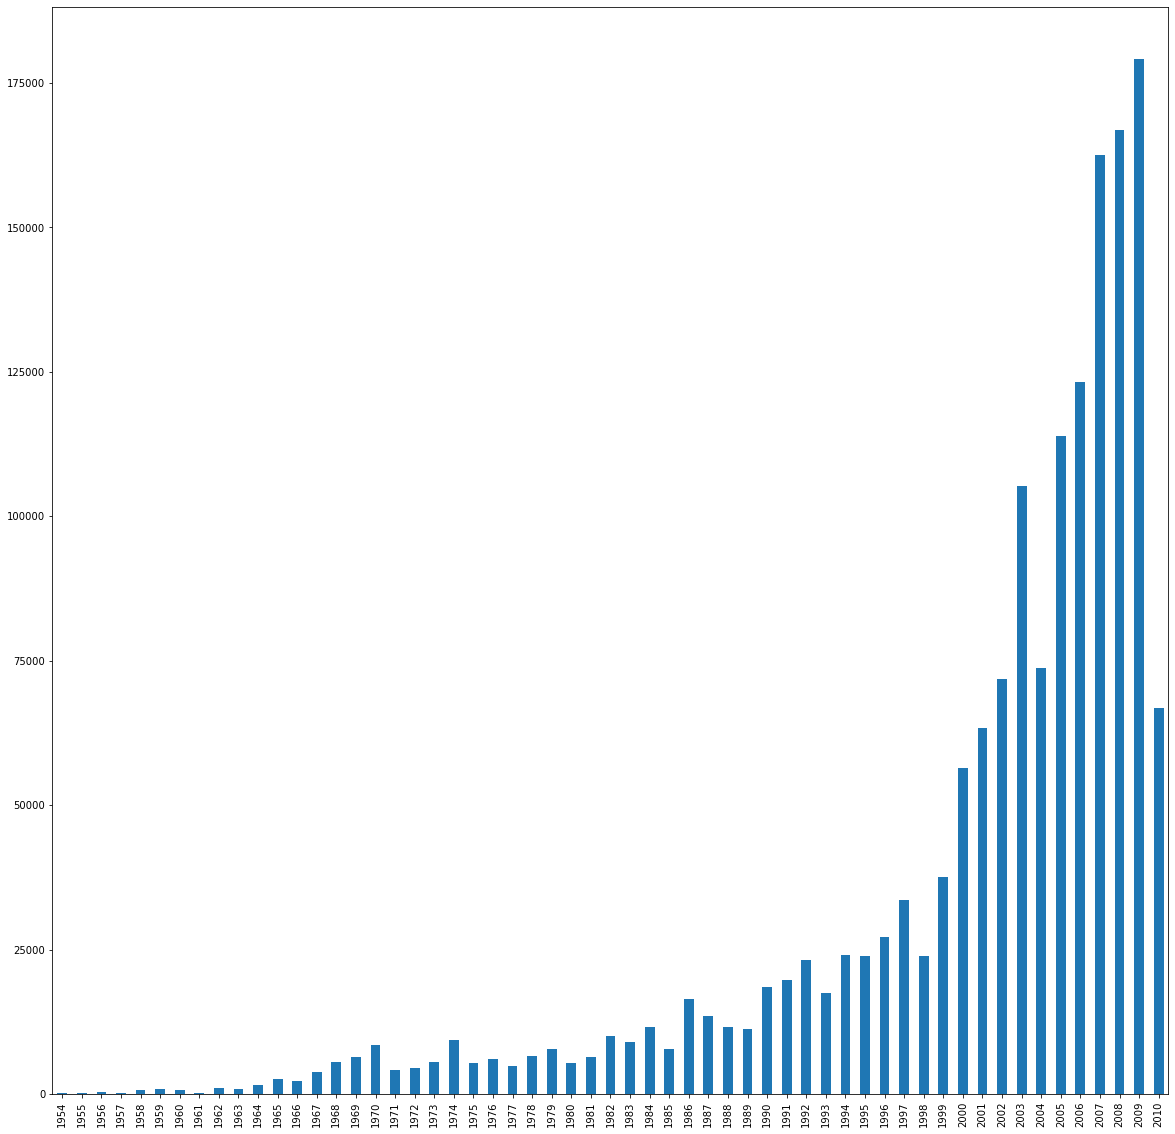

In [265]:
#Plot a barplot to visualize the count of songs played each year
plt.figure(figsize=(20,20))

df['year'].loc[lambda x : x>0].value_counts().sort_index().plot(kind='bar')

#### **Observations and Insights: We see that alsmot most listened songs have a release year 0. For those with available year, we see that number of songs increases over time of release. So the least number of songs listened are from year 1954, only 144,  and the most in year 2009, around 180000.**

## **Proposed approach**
**Potential techniques** - What different techniques should be explored?<br>
We shouold explore rank-based recommendation system, collaborative filtering (Similarity/Neighborhood based and Model based) and Clustering based recommendation system and content-based recommendation systems
**Overall solution design** - What is the potential solution design?<br>
We will use multiple approaches to get top 10 songs to reccomend. We have to take into account new users, who haven't listned to any songs and to which we can offer top ranked songs. This could as well be offered to exisitng users, in case they want to bransh out and hear a different type of music. Other, more personilized recommendations we can get for existing user by applying collaborative filtering, clusterin or content-based recomendation-system
**Measures of success**- What are the key measures of success?<br>
We can use RMSE (root mean squared error) to measure succes of our recommendation system. we can also use decision support metrics (Precision, Recall)


# **Music Recommendation System**

# **Milestone 2**

Now that we have explored the data, let's apply different algorithms to build recommendation systems

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems on the basis of the sum of play counts.

Now, we can create a function to find the **top n songs** for a recommendation based on the average ratings of all songs. We can also add a **threshold for a minimum number of interactions** for a song to be considered for recommendation.

In [22]:
#Build the function for finding top n songs
def top_n_songs(data, n, min_interaction=100):
    
    #Finding businesses with minimum number of interactions
    recommendations = data[data['count_sum'] > min_interaction]
    
    #Sorting values w.r.t average stars
    recommendations = recommendations.sort_values(by='play_count', ascending=False)
    
    return recommendations.index[:n]

In [24]:
play_count = df.groupby('title').sum()['play_count'] #Hint: Use groupby function on the title column
count_sum = df.groupby('title').count()['play_count'] #Hint: Use groupby function on the title column

In [25]:
final = pd.DataFrame({'count_sum':count_sum, 'play_count':play_count})
final.head()

,count_sum,play_count
title,,
#!*@ You Tonight [Featuring R. Kelly] (Explicit Album Version),78,148
#40,338,1831
& Down,373,739
' Cello Song,103,254
'97 Bonnie & Clyde,93,140


In [26]:
#Recommend top songs using the function defined above
list(top_n_songs(final, 10, 100))

["You're The One",
 'Undo',
 'Revelry',
 'Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)',
 'Sehr kosmisch',
 'Dog Days Are Over (Radio Edit)',
 'Secrets',
 'Canada',
 'Invalid',
 "Ain't Misbehavin"]

#### **Observations and Insights: We've looked into the most popular songs from the dataset and created a function to return top 10 songs that were listened by at least 100 users. This is useful for new users who haven't listened to any songs yet. **

### **Similarity-Based Collaborative Filtering**

**Think About It:** To build the similarity based collaborative filtering, we need to create user-item interactions matrix. Since this dataset is very big, the interaction matrix will be sparse. Can we create a shorter version of this dataset by filtering top 5000 most played songs and top 5000 users who has interacted the most? What would be the benefits of doing so?

In [27]:
#Find IDs of top 5000 songs
top_5000_songs = pd.DataFrame({'song_id':df['song_id'].value_counts()[:5000].index})
top_5000_songs.head()

,song_id
0,2220
1,317
2,352
3,614
4,7416


In [28]:
#Find IDs of top 5000 users
top_5000_users = pd.DataFrame({'user_id':df['user_id'].value_counts()[:5000].index})
top_5000_users.head()

,user_id
0,32542
1,75144
2,23297
3,10807
4,7834


In [187]:
#Filter the original data to contain only the top 5000 songs
df_small = top_5000_songs.merge(df, how='inner', on='song_id')
df_small.shape

(1547961, 7)

In [188]:
df_small = top_5000_users.merge(df_small, how='inner', on='user_id')
#Filter the data with top 5000 songs to contain only top 5000 users
df_small.shape

(456379, 7)

In [31]:
df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,32542,352,21,Dog Days Are Over (Radio Edit),Now That's What I Call Music! 75,Florence + The Machine,0
1,32542,614,1,You're The One,If There Was A Way,Dwight Yoakam,1990
2,32542,5531,3,Secrets,Waking Up,OneRepublic,2009
3,32542,1334,7,Hey_ Soul Sister,Save Me_ San Francisco,Train,0
4,32542,2115,2,Tive Sim,Nova Bis-Cartola,Cartola,1974


In [32]:
interactions_matrix = df_small.pivot(index='user_id', columns='song_id', values='play_count') #Use the smaller version of the original data to compute interaction matrix  
interactions_matrix.head()

song_id,1,4,5,11,14,15,16,17,20,21,...,9976,9977,9981,9983,9988,9989,9992,9994,9995,9996
user_id,,,,,,,,,,,,,,,,,,,,,
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **Observations and Insights: We reduced the data sample byt picking 5000 most played songs and 5000 users who interacted the most with those songs. Still, we can see that interaction matrix is very sparsely populated.**

In [33]:
# Replace the missing values in the interactions_matrix with 0 values.
interactions_matrix.fillna(0, inplace=True)
interactions_matrix.head()

song_id,1,4,5,11,14,15,16,17,20,21,...,9976,9977,9981,9983,9988,9989,9992,9994,9995,9996
user_id,,,,,,,,,,,,,,,,,,,,,
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, let's create a **function to find similar users and similarity scores for given user_id and interaction matrix**

In [34]:
#Build the function
def similar_users(user_id, interactions_matrix):
    similarity = [] 
    for user in interactions_matrix.index:
        
        #finding cosine similarity between the user_id and each user
        sim = cosine_similarity([interactions_matrix.loc[user_id]], [interactions_matrix.loc[user]])
        
        #Appending the user and the corresponding similarity score with user_id as a tuple 
        similarity.append((user, sim))
        
    similarity.sort(key=lambda x: x[1], reverse=True)   #Sorting the list on the basis of similarity scores
    
    most_similar_users = [tup[0] for tup in similarity] #Extracting the user from each tuple in the sorted list
    
    similarity_score = [tup[1] for tup in similarity]   #Extracting the similarity score from each tuple in the sorted list
    
    most_similar_users.remove(user_id)                  #Removing the original user and keeping only other similar users       
    similarity_score.remove(similarity_score[0])
       
    return most_similar_users, similarity_score

In [35]:
# Use the above function to find out the top 10 similar users for some user and their similarity scores
similar_users(11, interactions_matrix)[0][:10]

[69639, 47048, 3125, 49470, 5201, 42487, 42595, 29630, 61160, 46065]

In [36]:
similar_users(11, interactions_matrix)[1][:10]

[array([[0.20621993]]),
 array([[0.18138982]]),
 array([[0.17301886]]),
 array([[0.16731137]]),
 array([[0.15797828]]),
 array([[0.15713181]]),
 array([[0.12624167]]),
 array([[0.12609313]]),
 array([[0.12346444]]),
 array([[0.12238655]])]

# **Think About It:** We found similar users for a given user but how do we find which songs to recommend to a particular user?

In [37]:
#Build a function to recommend songs to users
def recommendations(user_id, num_of_songs, interactions_matrix, df_small):
    
    #Saving similar users using the function similar_users defined above
    most_similar_users = similar_users(user_id, interactions_matrix)[0]
    
    #Finding song IDs with which the user_id has interacted
    songs_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_id] > 0)]))
    recommendations = []
    
    observed_interactions = songs_ids.copy()
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_songs:
            #Finding 'n' businesses which have been rated by similar users but not by the user_id
            similar_user_songs_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_songs_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_songs_ids)
        else:
            break
            
    titles = df_small[df_small['song_id'].isin(recommendations[:num_of_songs])]['title'].unique()
    
    return list(titles)

In [38]:
#Recommend songs to a user using the function defined above
recommendations(11, 10, interactions_matrix, df_small)

['Bulletproof',
 "Livin' On A Prayer",
 'Hide & Seek',
 'Nice',
 'Halo',
 "Ain't Misbehavin",
 'Master Of Puppets',
 'Foolish',
 'Hallelujah (Album Version)',
 "Doesn't Mean Anything"]

#### **Observations and Insights: After creating a subset of 5000 most played songs and 5000 users who interacted with those songs the most, we looked at the similarity of those users using cosine similarity. Than we created a function that can recommend top 10 songs that similar users have listned to, but target user haven't listend yet.**

### **Model-Based Collaborative Filtering: Singular Value Decomposition**

Now, we will apply SVD and use **latent features** to find recommendations for each user.


In [39]:
u, s, vt = np.linalg.svd(interactions_matrix, full_matrices=False) #Hint: use np.linalg.svd() function

In [40]:
#Checking the shape of all three matrices 
print(u.shape)
print(s.shape)
print(vt.shape)

(5000, 5000)
(5000,)
(5000, 5000)


Now, we need to find the appropriate K (the number of latent features) to use in order to re-generate the interaction matrix and make predictions. We will split the data into **train and test data** and make predictions for different value of K. We will choose the K which gives good performance on the train and test data.

In [41]:
#Split the data
X_train, X_test = train_test_split(df_small, test_size=0.2, random_state=42) 

In [42]:
#Checking shape of the training and testing data
print(X_train.shape)
print(X_test.shape)

(365103, 7)
(91276, 7)


Let's create the **train and test interactions matrices**

In [43]:
#Create train interaction matrix
interactions_matrix_train = X_train.pivot(index='user_id', columns='song_id', values='play_count')
interactions_matrix_train.fillna(0, inplace=True)
interactions_matrix_train.shape

(5000, 5000)

In [190]:
#interactions_matrix_train[54238]
df_small[df_small['user_id']==54238]

,user_id,song_id,play_count,title,release,artist_name,year
340872,54238,2220,6,Sehr kosmisch,Musik von Harmonia,Harmonia,0
340873,54238,317,17,Undo,Vespertine Live,Björk,2001
340874,54238,614,6,You're The One,If There Was A Way,Dwight Yoakam,1990
340875,54238,7416,6,Revelry,Only By The Night,Kings Of Leon,2008
340876,54238,1664,5,Horn Concerto No. 4 in E flat K495: II. Romanc...,Mozart - Eine kleine Nachtmusik,Barry Tuckwell/Academy of St Martin-in-the-Fie...,0
...,...,...,...,...,...,...,...
340949,54238,3717,1,Right Where I Need To Be,Greatest Hits,Gary Allan,1999
340950,54238,8740,6,Starry Eyed Surprise (Album Version),Happy Love Sick,Shifty,2004
340951,54238,3746,2,Bouncing Around The Room (LP Version),Lawn Boy,Phish,1990
340952,54238,6101,1,Ambling Alp (DJ /Rupture & Brent Arnold Remix),Ambling Alp,Yeasayer,2009


In [44]:
#Create test interaction matrix
interactions_matrix_test = X_test.pivot(index='user_id', columns='song_id', values='play_count')
interactions_matrix_test.fillna(0, inplace=True)
interactions_matrix_test.shape

(5000, 4993)

We can use the **interactions matrix of the train data** to find U, S, and V transpose using SVD. Then find the subset of rows in the **interactions matrix of the test data**  which we can predict using this matrix decomposition with different numbers of latent features.

In [45]:
#Find unique users in train and test data and then taking their intersection i.e. common users in train and test data
train_idx = set(interactions_matrix_train.index)
test_idx = set(interactions_matrix_test.index)
match_idx = train_idx.intersection(test_idx)

In [46]:
#Find unique songs in train and test data and then taking their intersection i.e. common businesses in train and test data
train_song = set(interactions_matrix_train.columns)
test_song = set(interactions_matrix_test.columns)
match_cols = train_song.intersection(test_song)

In [47]:
#Select only common users and songs from the test interaction matrix
interactions_matrix_test = interactions_matrix_test.loc[match_idx, match_cols]
interactions_matrix_test.shape

(5000, 4993)

Now, decompose the **interactions matrix of the train data** and **find the U and Vt for the test data** using the common users and songs in the train and test data

In [48]:
u_train, s_train, vt_train = np.linalg.svd(interactions_matrix_train, full_matrices=False)

In [49]:
#Find u_test and vt_test matrices using u_train, vt_train, and common user/songs in train and test data
row_idxs = interactions_matrix_train.index.isin(test_idx)
col_idxs = interactions_matrix_train.columns.isin(test_song)
u_test = u_train[row_idxs, :]
vt_test = vt_train[:, col_idxs]

We have calculated U and Vt matrices for the train as well as test data. Now, we need to find the number of latent features that give us the **lowest RMSE on the train and the test data**.

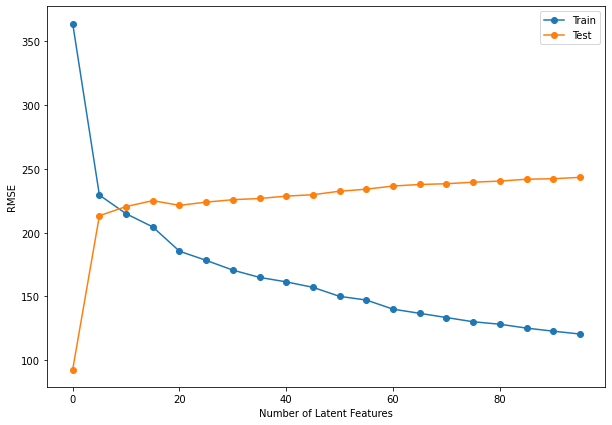

In [51]:
#Choose the best K - number of latent features
latent_features = np.arange(0, 100, 5) 
train_error = []
test_error = []
from sklearn.metrics import mean_squared_error
for k in latent_features:
    #Slicing the U, S, and Vt matrices to get k latent features from train and test data 
    s_train_lat, u_train_lat, vt_train_lat = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    u_test_lat, vt_test_lat = u_test[:, :k], vt_test[:k, :]
    
    #Regenerating train and test interaction matrices using k latent features
    interactions_matrix_train_preds = np.around(np.matmul(np.matmul(u_train_lat, s_train_lat), vt_train_lat))
    interactions_matrix_test_preds = np.around(np.matmul(np.matmul(u_test_lat, s_train_lat), vt_test_lat))
    
    #Calculating the actual and predicted average stars for each business in the training data
    avg_star_train = interactions_matrix_train.sum(axis=0)
    avg_star_train_pred = interactions_matrix_train_preds.sum(axis=0)
    
    #Calculating the actual and predicted average stars for each business in the test data
    avg_star_test = interactions_matrix_test.sum(axis=0)
    avg_star_test_pred = interactions_matrix_test_preds.sum(axis=0)
    
    #Calculating train and test RMSE
    train_rmse = mean_squared_error(avg_star_train, avg_star_train_pred, squared=False)
    test_rmse = mean_squared_error(avg_star_test, avg_star_test_pred, squared=False)
    
    train_error.append(train_rmse)
    test_error.append(test_rmse)
    
#Plotting train and test RMSE
plt.figure(figsize=(10,7))
plt.plot(latent_features, train_error, label='Train', marker='o');
plt.plot(latent_features, test_error, label='Test', marker='o');
plt.xlabel('Number of Latent Features');
plt.ylabel('RMSE');
plt.legend();

#### **Observations and Insights: From the above plot we can see that we got a reasonable RMSE in both train and test dataset at around latent features=10. If we increase the latent features it will be overfitted and decreasing the latent features will underfit the model.**

Let us now reconstruct the matrices using  the number of latent features selected above

**Now, let's recreate the original interaction matrix with the same number of latent features and create a function to recommend the top songs**

In [52]:
# Singular Value Decomposition
U, sigma, Vt = svds(interactions_matrix, k = 10)

# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [53]:
all_user_predicted_counts = np.dot(np.dot(U, sigma), Vt)

# Predicted ratings
preds_df = pd.DataFrame(abs(all_user_predicted_counts), columns = interactions_matrix.columns, index = interactions_matrix.index)
preds_df.head()

song_id,1,4,5,11,14,15,16,17,20,21,...,9976,9977,9981,9983,9988,9989,9992,9994,9995,9996
user_id,,,,,,,,,,,,,,,,,,,,,
11,0.002219,0.000852,0.002777,0.000551,0.000469,0.000739,0.003208,0.001284,0.001490,0.011433,...,0.001387,0.001987,0.008450,0.001151,0.001330,0.001835,0.000715,0.003328,0.001105,0.000340
17,0.002011,0.001413,0.004827,0.001189,0.000851,0.000764,0.004809,0.002502,0.002797,0.021271,...,0.001240,0.003790,0.014290,0.001528,0.002050,0.001906,0.001239,0.001186,0.001186,0.000391
32,0.043466,0.016902,0.054508,0.009044,0.007830,0.013344,0.062273,0.023461,0.023114,0.210431,...,0.028473,0.031014,0.160363,0.020848,0.023029,0.038744,0.011172,0.074325,0.025293,0.006691
42,0.029974,0.017026,0.059373,0.014449,0.010144,0.010185,0.062571,0.028882,0.034850,0.255174,...,0.018659,0.047943,0.169929,0.019203,0.024595,0.026759,0.015846,0.028938,0.016714,0.005397
57,0.010089,0.004350,0.016497,0.004126,0.003007,0.002180,0.017288,0.007896,0.010390,0.075190,...,0.006812,0.019204,0.047658,0.005910,0.006041,0.009019,0.005849,0.013312,0.004868,0.001865


In [54]:
#Build the function to recommend top songs 
def recommend_song(user_idx, interactions_matrix, preds_df, num_recommendations):
          
    # Get and sort stars given by users from the actual and predicted interaction matrix
    sorted_user_stars = interactions_matrix.loc[user_idx].sort_values(ascending=False)
    sorted_user_predictions = preds_df.loc[user_idx].sort_values(ascending=False)
    
    #Creating a dataframe with actual and predicted stars columns
    temp = pd.concat([sorted_user_stars, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Songs'
    temp.columns = ['user_sum', 'user_predictions']
    
    #Filtering the dataframe where actual stars are 0 which implies that the user has not interacted with that business
    temp = temp.loc[temp.user_sum == 0]   
    
    #Recommending businesses with top predicted stars
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended songs for user(user_id = {}):\n'.format(user_idx))
    print(temp['user_predictions'].head(num_recommendations))
    return temp.head(num_recommendations)

In [55]:
#Recommend songs to some user using the function defined above
songs=recommend_song(42, interactions_matrix, preds_df, 10)


Below are the recommended songs for user(user_id = 42):

Recommended Songs
6246    3.138112
352     2.525309
2220    2.286511
5531    1.798647
8582    1.782274
605     1.661170
7796    1.571440
97      1.517482
4806    1.509068
7103    1.420961
Name: user_predictions, dtype: float64


In [56]:
#Finding the title of the recommended songs using song_id
for i in songs.index:
  print(df['title'][df['song_id']==i].unique())

['Canada']
['Dog Days Are Over (Radio Edit)']
['Sehr kosmisch']
['Secrets']
['Use Somebody']
['Lucky (Album Version)']
['Love Story']
['Harder Better Faster Stronger']
['Who Can Compare']
['Alejandro']


In [57]:
#Create a dataframe containing average actual and average predicted play_counts of the songs and calculate the RMSE
rmse_df = pd.concat([interactions_matrix.sum(), preds_df.sum()], axis=1)
rmse_df.columns = ['Actual_play_count', 'Predicted_play_count']
print(rmse_df)
RMSE = mean_squared_error(rmse_df['Actual_play_count'], rmse_df['Predicted_play_count'], squared=False)
print('\nRMSE SVD Model = {} \n'.format(RMSE))

         Actual_play_count  Predicted_play_count
song_id                                         
1                    190.0             74.201907
4                    121.0             43.870830
5                    231.0            128.128847
11                   136.0             33.479053
14                    51.0             21.633399
...                    ...                   ...
9989                 215.0             62.402194
9992                  91.0             34.306664
9994                 150.0            128.734054
9995                 102.0             56.632126
9996                  82.0             17.136837

[5000 rows x 2 columns]

RMSE SVD Model = 165.85148904150913 



#### **Observations and Insights: After applying SVD and using 10 latent features we created function that recommend top 10 songs.  RMSE for SVD model is 165 which looks significant compared to actual values we observed.**

### **Clustering-Based Recommendation Systems** 

In clustering-based recommendation systems, we explore the similarities and differences in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on ratings from other users in the same cluster.

First, let's choose the optimal number of clusters i.e. K for K-means clustering

#### **Choosing an optimal K**

We will try different values of k and calculate the **sum of squared errors (SSE) for each k**, then we will use the **elbow plot** to choose the optimal value of k

In [85]:
interaction_matrix = df_small.pivot(index='user_id', columns='song_id', values='play_count')
interaction_matrix.head()

song_id,1,4,5,11,14,15,16,17,20,21,...,9976,9977,9981,9983,9988,9989,9992,9994,9995,9996
user_id,,,,,,,,,,,,,,,,,,,,,
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


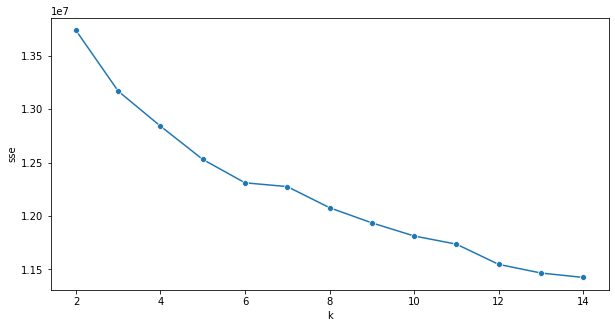

In [87]:
#Find the best k using the elbow plot
#print(interactions_matrix)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
interaction_matrix.fillna(0, inplace=True)
sse = [] #Empty list to store the sum of squared errors for each value of k

for k in range(2, 15, 1):
    
    kmeans = KMeans(n_clusters=k, random_state=42).fit(interaction_matrix)
    
    sse.append(kmeans.inertia_)
error_data = pd.DataFrame({'k':range(2, 15, 1), 'sse':sse})

plt.figure(figsize=(10,5))

sns.lineplot(x='k', y='sse', data=error_data, marker='o')

plt.show()

Now, we can create the interaction matrix again using the small version of the original data and fill the NA values within it.

In [92]:
interaction_matrix = df_small.pivot(index='user_id', columns='song_id', values='play_count')
interaction_matrix.head()

song_id,1,4,5,11,14,15,16,17,20,21,...,9976,9977,9981,9983,9988,9989,9992,9994,9995,9996
user_id,,,,,,,,,,,,,,,,,,,,,
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
#Replace NA values with 0 values in the interaction matrix
interaction_matrix.fillna(0, inplace=True)

In [93]:
interaction_matrix.head()

song_id,1,4,5,11,14,15,16,17,20,21,...,9976,9977,9981,9983,9988,9989,9992,9994,9995,9996
user_id,,,,,,,,,,,,,,,,,,,,,
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let's create functions to find the most played songs and the most interacted users   

In [94]:
def find_most_played_songs(interaction_matrix, num_songs):
    
       #Finding how many of the top 30 songs have been played by the user 
    user_song_played = interaction_matrix.append(interaction_matrix.count(), ignore_index=True)
    
    #Sorting the values in the interaction matrix on the basis of the appended row
    user_song_played_sorted = user_song_played.sort_values(len(user_song_played)-1, axis=1, ascending=False)
    
    #Dropping the appended row from the sorted interaction matrix
    user_song_played_sorted = user_song_played_sorted.drop(user_song_played_sorted.tail(1).index)
    
    #Selecting top businesses with the most number of stars
    most_played_songs = user_song_played_sorted.iloc[:, :num_songs]
      
    
    return most_played_songs

In [97]:
#Use the function defined above to find the 30 most played songs
most_played_songs = find_most_played_songs(interaction_matrix, 30)
most_played_songs

song_id,352,2220,5531,8582,7416,4152,317,4448,1118,1334,...,2115,605,2091,703,9931,5367,7103,6230,8612,4284
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
def find_most_interacted_users(most_played_songs, num_users):
    
    #Finding how many of the top 30 songs have been played by the user 
    most_played_songs['counts'] = pd.Series(most_played_songs.count(axis=1))
    
    #Sorting the dataframe by the new 'counts' columns
    most_played_songs = most_played_songs.sort_values('counts', ascending=False)
    
    #Selecting top users with the most number of interactions
    most_played_songs_users_selected = most_played_songs.iloc[:num_users, :]
    
    #Dropping the 'counts' column
    most_played_songs_users_selected.drop(['counts'], axis=1, inplace=True)
    
    return most_played_songs_users_selected

In [98]:
#Use the function defined above to find the 20 most interacted users for 30 most played songs
most_played_songs_users_selected = find_most_interacted_users(most_played_songs, 20)
most_played_songs_users_selected

song_id,352,2220,5531,8582,7416,4152,317,4448,1118,1334,...,2115,605,2091,703,9931,5367,7103,6230,8612,4284
2820,8.0,9.0,16.0,7.0,8.0,6.0,9.0,9.0,4.0,7.0,...,4.0,8.0,4.0,2.0,3.0,3.0,8.0,8.0,5.0,3.0
4031,3.0,1.0,2.0,2.0,8.0,3.0,14.0,1.0,2.0,1.0,...,1.0,1.0,3.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0
550,6.0,6.0,9.0,6.0,11.0,4.0,22.0,4.0,4.0,5.0,...,6.0,4.0,2.0,1.0,1.0,1.0,4.0,2.0,2.0,4.0
2378,7.0,6.0,6.0,2.0,5.0,2.0,6.0,5.0,1.0,3.0,...,1.0,2.0,2.0,3.0,2.0,2.0,8.0,7.0,3.0,2.0
4545,2.0,2.0,3.0,3.0,7.0,3.0,8.0,2.0,3.0,2.0,...,3.0,3.0,3.0,1.0,1.0,2.0,3.0,3.0,3.0,3.0
1748,4.0,3.0,11.0,5.0,11.0,2.0,11.0,10.0,2.0,2.0,...,5.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0
214,10.0,157.0,35.0,150.0,36.0,4.0,44.0,4.0,4.0,5.0,...,16.0,156.0,3.0,4.0,5.0,6.0,156.0,9.0,4.0,5.0
1995,6.0,7.0,6.0,8.0,9.0,3.0,9.0,8.0,3.0,9.0,...,3.0,3.0,4.0,1.0,1.0,1.0,2.0,3.0,6.0,3.0
4001,6.0,6.0,4.0,4.0,6.0,3.0,10.0,4.0,2.0,6.0,...,2.0,3.0,4.0,2.0,2.0,1.0,7.0,2.0,1.0,4.0
1524,5.0,7.0,5.0,7.0,18.0,4.0,26.0,5.0,4.0,4.0,...,3.0,5.0,4.0,2.0,2.0,1.0,3.0,4.0,4.0,5.0


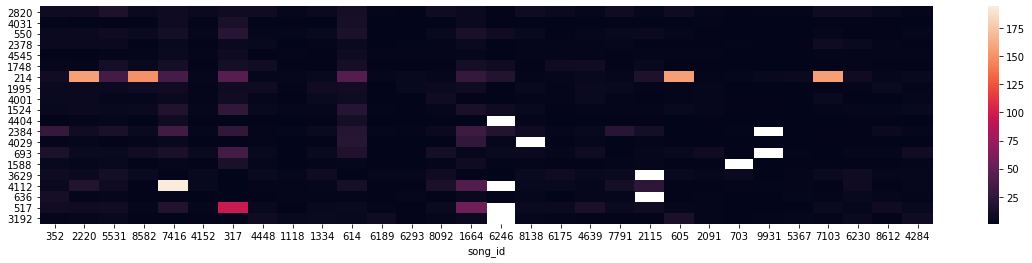

In [99]:
#Use heatmap to visualize the above output i.e. the most played songs by most interacted users
figure = plt.figure(figsize=(20, 4))
sns.heatmap(most_played_songs_users_selected);

**Observations and Insights: We can see in both, matrix and heat map, that there are only a few users that haven't listened to 30 most played songs.And there are 4-5 very popular songs among these 30.**

Now, let's cluster each user using K-Means clustering with K chosen above. We will **add one column `group` with cluster labels** to the **most played songs data**. 

In [102]:
predictions = KMeans(n_clusters=6, random_state=42).fit_predict(interaction_matrix) #Fit and predict using KMeans algorithm on the interaction matrix
results = pd.concat([most_played_songs.reset_index(), pd.DataFrame({'group':predictions})], axis=1)#Concatenate most played songs data and the predictions 
results

,index,352,2220,5531,8582,7416,4152,317,4448,1118,...,2091,703,9931,5367,7103,6230,8612,4284,counts,group
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
1,1,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3,3
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3
3,3,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,4,3
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
4996,4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,2,3
4997,4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3
4998,4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3


Let's check the count of user in each cluster

In [103]:
#Check the count of users in each cluster
results['group'].value_counts()

3    4614
0     381
4       2
2       1
5       1
1       1
Name: group, dtype: int64

**Observations and Insights: We see that most users, almost 92% ended up in one cluster. Another much smaller cluster had almost 8% of users. The rest were insignificant. SO clustering didn't provide good breakdown of users.**

Let's visualize **the biggest cluster** and check how sparse or dense the cluster is. It would be difficult to visualize large clusters, so let's plot **only 50 users and songs with most interactions**.

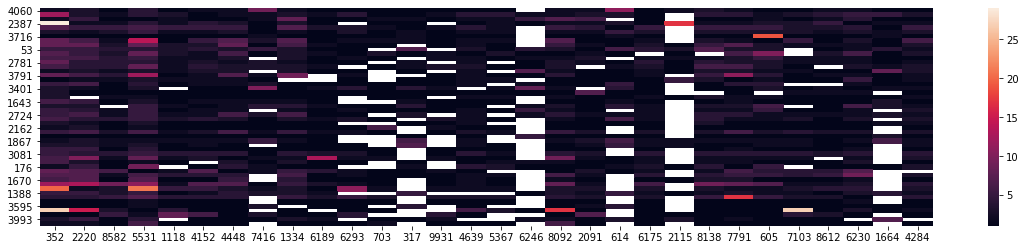

In [104]:
cluster_number = 3
n_users = 50
n_songs = 50

#Filter the results dataframe to extract users in the cluster
cluster_3_predictions = results[results.group == cluster_number].drop(['group', 'index'], axis=1)
#Find top 50 songs with the most number of interactions
cluster_3_songs = find_most_played_songs(cluster_3_predictions, n_songs)
#Finding top 50 users with the most number of interactions 
cluster_3_users = find_most_interacted_users(cluster_3_songs, n_users)
#Visualize using heatmap
figure = plt.figure(figsize=(20, 4))
sns.heatmap(cluster_3_users);

Now, let's **recommend songs** to a user from the chosen cluster. Let's select the user in cluster with most number of interactions

In [105]:
#Hint: use find_most_interacted_users function defined above
find_most_interacted_users(cluster_3_predictions, 1).index

Int64Index([4404], dtype='int64')

**Observations and Insights: The heatmap shows that cluster 3 subset is dense with some NaN values. Most songs were listneed to under 5 times**

Now, let's find the songs not played by the user, and recommend the top 5 songs that have the highest play count by the users in the same cluster.

In [106]:
#recommend top 5 songs based on clustering based recommendation systems
user_id = 4404

user_id_plays  = cluster_3_predictions.loc[user_id, :]

user_id_unplayed_songs =  user_id_plays[user_id_plays.isnull()]


avg_stars = pd.concat([user_id_unplayed_songs, cluster_3_predictions.sum()], axis=1, join='inner').loc[:,0]

avg_stars = pd.DataFrame(avg_stars.sort_values(ascending=False).reset_index())

avg_stars.columns = ['song_id', 'play_count']

song_name = df[df['song_id'].isin(user_id_unplayed_songs.index)][['song_id', 'title']].drop_duplicates().reset_index(drop=True)

song_name.merge(avg_stars, on='song_id').sort_values(by='play_count', ascending=False).head(5)

,song_id,title,play_count
0,6246,Canada,3530.0


In [67]:
#recommend top 5 songs based on clustering based recommendation systems
user_id = 1388

user_id_plays  = cluster_3_predictions.loc[user_id, :]

user_id_unplayed_songs =  user_id_plays[user_id_plays.isnull()]


avg_stars = pd.concat([user_id_unplayed_songs, cluster_3_predictions.sum()], axis=1, join='inner').loc[:,0]

avg_stars = pd.DataFrame(avg_stars.sort_values(ascending=False).reset_index())

avg_stars.columns = ['song_id', 'play_count']

song_name = df[df['song_id'].isin(user_id_unplayed_songs.index)][['song_id', 'title']].drop_duplicates().reset_index(drop=True)

song_name.merge(avg_stars, on='song_id').sort_values(by='play_count', ascending=False).head(5)

,song_id,title,play_count
2,352,Dog Days Are Over (Radio Edit),4607.0
29,6246,Canada,3530.0
0,2220,Sehr kosmisch,3479.0
7,5531,Secrets,3077.0
1,317,Undo,2515.0


**Observations and Insights: Even though we wanted ro recommend top 5 songs to the user with most interactions we only got one song, since the user listened to all other songs from the subset of songs we selected. If we select another users with less interaction we will get the list of 5 top recommended songs**

### **Content-Based Recommendation Systems**

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In content-based recommendation system, we would be using the feature - **text**. In this dataset, we don't have any song review but we can combine the columns - **title**, **release**, and **artist_name** to create a text-based feature and apply **tfidf** feature extraction technique to extract features, which we later use to compute similar songs based on these texts.

In [74]:
df_small['text'] = df_small['title']+' '+df_small['release']+' '+df_small['artist_name'] #Use the smaller version of the original data to get the feature 'text'

Now, we can **keep only five columns** - user_id, sing_id, play_count, title, and text. We will drop the duplicate titles from the data and make it the **title column as the index** of the dataframe

In [75]:
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]
df_small = df_small.drop_duplicates(['title'])
df_small = df_small.set_index('title')
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Dog Days Are Over (Radio Edit),32542,352,21,Dog Days Are Over (Radio Edit) Now That's What...
You're The One,32542,614,1,You're The One If There Was A Way Dwight Yoakam
Secrets,32542,5531,3,Secrets Waking Up OneRepublic
Hey_ Soul Sister,32542,1334,7,Hey_ Soul Sister Save Me_ San Francisco Train
Tive Sim,32542,2115,2,Tive Sim Nova Bis-Cartola Cartola


In [76]:
#Checking first five indices
indices = pd.Series(df_small.index)
indices.head(5)

0    Dog Days Are Over (Radio Edit)
1                    You're The One
2                           Secrets
3                  Hey_ Soul Sister
4                          Tive Sim
Name: title, dtype: object

In [77]:
import re
import nltk
#download all the nltk packages required here
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mlade\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mlade\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


We will create a **function to pre-process the text data:**
- **Stopwords:** A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that does not contain information in the text and can be ignored.
- **Lemmatization:** Lemmatization in linguistics is the process of grouping together the inflected forms of a word so they can be analyzed as a single item. For example, runs, running, ran are all forms of the word run, therefore run is the lemma of all these words.

In [78]:
#Build the function to preprocess the data
def tokenize(text):
    
    #Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ",text.lower())
    
    #Extracting each word in the text
    tokens = word_tokenize(text)
    
    #Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]
    
    #Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [79]:
#Apply TF-IDF transformation on the text column using the function defined above
tfidf = TfidfVectorizer(tokenizer=tokenize)
df_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()


We have extracted **features** from the text data. Now, we can find similarities between songs using these features. We will use cosine similarity to calculate the similarity.

In [80]:
#Find similar songs
similar_song = cosine_similarity(df_tfidf, df_tfidf)
similar_song

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song

In [81]:
# Create a function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_song):
    
    recommended_songs = []
    
    indices = pd.Series(df_small.index)
    
    # getting the index of the business that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_song[idx]).sort_values(ascending = False)

    # getting the indices of 10 most similar businesses
    top_10_indexes = list(score_series.iloc[1:11].index)
    print(top_10_indexes)
    
    # populating the list with the titles of the best 10 matching businesses
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

Recommend top songs similar to some song

In [82]:
#Recommend songs using the function defined above
recommendations('Secrets', similar_song)

[4443, 4524, 4227, 2912, 4606, 3265, 1939, 571, 2138, 703]


['Waking Up',
 'All This Time',
 'Fear',
 'Made For You',
 'Everybody Loves Me',
 'Marchin On',
 'All The Right Moves',
 'Dirty Little Secret',
 'All We Are',
 'Waking Up In Vegas (Calvin Harris Remix Edit)']

# Evaluation

In [109]:
interactions_train_df, interactions_test_df = train_test_split(df_small,
                                   stratify=df_small['user_id'], 
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 365103
# interactions on Test set: 91276


In [111]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = df_small.set_index('user_id')
interactions_train_indexed_df = interactions_train_df.set_index('user_id')
interactions_test_indexed_df = interactions_test_df.set_index('user_id')

In [112]:
def get_items_interacted(user_id, interactions_df):
    # Get the user's data and merge in the movie information.
    interacted_items = interactions_df.loc[user_id]['song_id']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [132]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:


    def get_not_interacted_items_sample(self, person_id, sample_size, seed=42):
        interacted_items = get_items_interacted(person_id, interactions_full_indexed_df)
        all_items = set(top_5000_songs['song_id'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    def evaluate_model_for_user(self, model, person_id):
        #Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        if type(interacted_values_testset['song_id']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['song_id'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['song_id'])])  
        interacted_items_count_testset = len(person_interacted_items_testset) 

        #Getting a ranked recommendation list from a model for a given user
        person_recs_df = model.recommend_items(person_id, 
                                               items_to_ignore=get_items_interacted(person_id, 
                                                                                    interactions_train_indexed_df), 
                                               topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        #For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            #Getting a random sample (100) items the user has not interacted 
            #(to represent items that are assumed to be no relevant to the user)
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, 
                                                                          sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, 
                                                                          seed=item_id%(2**32))

            #Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            #Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['song_id'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['song_id'].values
            #Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        #Recall is the rate of the interacted items that are ranked among the Top-N recommended items, 
        #when mixed with a set of non-relevant items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    def evaluate_model(self, model):
        #print('Running evaluation for users')
        people_metrics = []
        print(len(list(interactions_test_indexed_df.index.unique().values)))
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):
            if idx % 500 == 0 and idx > 0:
                print('%d users processed' % idx)
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['_person_id'] = person_id
            people_metrics.append(person_metrics)
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics) \
                            .sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()    

In [115]:
item_popularity_df = df_small.groupby('song_id')['play_count'].sum().sort_values(ascending=False).reset_index()
item_popularity_df.head(10)

,song_id,play_count
0,614,7740
1,317,7615
2,352,6602
3,7416,6219
4,2220,5747
5,6246,5485
6,1664,5473
7,5531,5151
8,7913,4013
9,1334,3379


In [130]:
class PopularityRecommender:
    
    MODEL_NAME = 'Popularity'
    
    def __init__(self, popularity_df, items_df=None):
        self.popularity_df = popularity_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Recommend the more popular items that the user hasn't seen yet.
        recommendations_df = self.popularity_df[~self.popularity_df['song_id'].isin(items_to_ignore)] \
                               .sort_values('play_count', ascending = False) \
                               .head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'song_id', 
                                                          right_on = 'song_id')


        return recommendations_df
    
popularity_model = PopularityRecommender(item_popularity_df, df_small)

In [133]:
print('Evaluating Popularity recommendation model...')
pop_global_metrics, pop_detailed_results_df = model_evaluator.evaluate_model(popularity_model)
print('\nGlobal metrics:\n%s' % pop_global_metrics)
pop_detailed_results_df.head(10)

Evaluating Popularity recommendation model...
5000
500 users processed
1000 users processed
1500 users processed
2000 users processed
2500 users processed
3000 users processed
3500 users processed
4000 users processed
4500 users processed
4999 users processed

Global metrics:
{'modelName': 'Popularity', 'recall@5': 0.24509180945703143, 'recall@10': 0.3376791270432534}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
570,12,20,107,0.112150,0.186916,75144
848,27,43,101,0.267327,0.425743,32542
1118,34,35,89,0.382022,0.393258,61472
56,11,15,86,0.127907,0.174419,10807
1139,17,21,84,0.202381,0.250000,31704
667,13,26,83,0.156627,0.313253,23297
442,23,33,80,0.287500,0.412500,48273
556,4,13,80,0.050000,0.162500,23790
498,15,24,76,0.197368,0.315789,31692
294,11,16,76,0.144737,0.210526,49507


In [150]:
df_small['text'] = df_small['title']+' '+df_small['release']+' '+df_small['artist_name']

In [151]:
tfidf = TfidfVectorizer(tokenizer=tokenize)

In [153]:
df_tfidf = tfidf.fit_transform(df_small['text'].values)

In [162]:
def get_item_profile(item_id):
    idx = item_ids.index(item_id)
    item_profile = df_tfidf[idx:idx+1]
    return item_profile

def get_item_profiles(ids):
    item_profiles_list = [get_item_profile(x) for x in ids]
    item_profiles = scipy.sparse.vstack(item_profiles_list)
    return item_profiles

def build_users_profile(person_id, interactions_indexed_df):
    interactions_person_df = interactions_indexed_df.loc[person_id]
    user_item_profiles = get_item_profiles(interactions_person_df['song_id'])
    #print(user_item_profiles.shape)
    user_item_strengths = np.array(interactions_person_df['play_count']).reshape(-1,1)
    #print(user_item_strengths.shape)
    #Weighted average of item profiles by the interactions strength
    user_item_strengths_weighted_avg = np.sum(user_item_profiles.multiply(user_item_strengths), axis=0) / np.sum(user_item_strengths)
    user_profile_norm = sklearn.preprocessing.normalize(user_item_strengths_weighted_avg)
    return user_profile_norm

def build_users_profiles(): 
    interactions_indexed_df = interactions_train_df[interactions_train_df['song_id'] \
                                                   .isin(df_small['song_id'])].set_index('user_id')
    user_profiles = {}
    for person_id in interactions_indexed_df.index.unique():
        user_profiles[person_id] = build_users_profile(person_id, interactions_indexed_df)
    return user_profiles

In [163]:
user_profiles = build_users_profiles()
len(user_profiles)

5000

In [166]:
class ContentBasedRecommender:
    
    MODEL_NAME = 'Content-Based'
    
    def __init__(self, items_df=None):
        self.item_ids = item_ids
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def _get_similar_items_to_user_profile(self, person_id, topn=1000):
        #Computes the cosine similarity between the user profile and all item profiles
        cosine_similarities = cosine_similarity(user_profiles[person_id], df_tfidf)
        #Gets the top similar items
        similar_indices = cosine_similarities.argsort().flatten()[-topn:]
        #Sort the similar items by similarity
        similar_items = sorted([(item_ids[i], cosine_similarities[0,i]) for i in similar_indices], key=lambda x: -x[1])
        return similar_items
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        similar_items = self._get_similar_items_to_user_profile(user_id)
        #Ignores items the user has already interacted
        similar_items_filtered = list(filter(lambda x: x[0] not in items_to_ignore, similar_items))
        
        recommendations_df = pd.DataFrame(similar_items_filtered, columns=['song_id', 'play_count']) \
                                    .head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'song_id', 
                                                          right_on = 'song_id')


        return recommendations_df
    
content_based_recommender_model = ContentBasedRecommender(df_small)

In [167]:
print('Evaluating Content-Based Filtering model...')
cb_global_metrics, cb_detailed_results_df = model_evaluator.evaluate_model(content_based_recommender_model)
print('\nGlobal metrics:\n%s' % cb_global_metrics)
cb_detailed_results_df.head(10)

Evaluating Content-Based Filtering model...
5000
500 users processed
1000 users processed
1500 users processed
2000 users processed
2500 users processed
3000 users processed
3500 users processed
4000 users processed
4500 users processed
4999 users processed

Global metrics:
{'modelName': 'Content-Based', 'recall@5': 0.02044349007406109, 'recall@10': 0.02044349007406109}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
570,0,0,107,0.000000,0.000000,75144
848,1,1,101,0.009901,0.009901,32542
1118,0,0,89,0.000000,0.000000,61472
56,0,0,86,0.000000,0.000000,10807
1139,1,1,84,0.011905,0.011905,31704
667,1,1,83,0.012048,0.012048,23297
442,0,0,80,0.000000,0.000000,48273
556,1,1,80,0.012500,0.012500,23790
498,1,1,76,0.013158,0.013158,31692
294,0,0,76,0.000000,0.000000,49507


In [193]:
all_user_predicted_counts_norm = (all_user_predicted_counts - all_user_predicted_counts.min()) / (all_user_predicted_counts.max() - all_user_predicted_counts.min())
preds_df = pd.DataFrame(all_user_predicted_counts_norm, columns = interactions_matrix.columns, index = interactions_matrix.index).transpose()
preds_df.head()

user_id,11,17,32,42,57,84,92,120,131,139,...,76201,76226,76265,76287,76300,76307,76331,76333,76342,76347
song_id,,,,,,,,,,,,,,,,,,,,,
1,0.014214,0.014214,0.014233,0.014227,0.014218,0.014225,0.014233,0.014214,0.014215,0.014225,...,0.014217,0.014283,0.014215,0.014214,0.014225,0.014220,0.014225,0.014218,0.014215,0.014214
4,0.014214,0.014214,0.014221,0.014221,0.014215,0.014219,0.014221,0.014214,0.014214,0.014221,...,0.014219,0.014241,0.014214,0.014218,0.014218,0.014216,0.014218,0.014215,0.014214,0.014214
5,0.014215,0.014216,0.014238,0.014240,0.014221,0.014228,0.014240,0.014214,0.014215,0.014235,...,0.014231,0.014302,0.014217,0.014228,0.014230,0.014222,0.014230,0.014219,0.014216,0.014214
11,0.014214,0.014214,0.014217,0.014220,0.014215,0.014217,0.014218,0.014214,0.014214,0.014218,...,0.014218,0.014229,0.014214,0.014218,0.014217,0.014215,0.014217,0.014214,0.014214,0.014214
14,0.014214,0.014214,0.014217,0.014218,0.014215,0.014214,0.014217,0.014213,0.014214,0.014217,...,0.014216,0.014226,0.014214,0.014216,0.014216,0.014215,0.014215,0.014214,0.014214,0.014214


In [198]:

len(preds_df.columns)
print(preds_df.columns)

Int64Index([   11,    17,    32,    42,    57,    84,    92,   120,   131,
              139,
            ...
            76201, 76226, 76265, 76287, 76300, 76307, 76331, 76333, 76342,
            76347],
           dtype='int64', name='user_id', length=5000)


In [203]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False) \
                                    .reset_index().rename(columns={user_id: 'recStrength'})
        # Recommend the highest predicted rating movies that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['song_id'].isin(items_to_ignore)] \
                               .sort_values('recStrength', ascending = False) \
                               .head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'song_id', 
                                                          right_on = 'song_id')


        return recommendations_df
    
cf_recommender_model = CFRecommender(preds_df, df_small)

In [204]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)
print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
5000
500 users processed
1000 users processed
1500 users processed
2000 users processed
2500 users processed
3000 users processed
3500 users processed
4000 users processed
4500 users processed
4999 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.2545576055041851, 'recall@10': 0.3455563346334195}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
570,10,21,107,0.093458,0.196262,75144
848,64,89,101,0.633663,0.881188,32542
1118,39,46,89,0.438202,0.516854,61472
56,10,16,86,0.116279,0.186047,10807
1139,16,19,84,0.190476,0.226190,31704
667,16,24,83,0.192771,0.289157,23297
442,24,36,80,0.300000,0.450000,48273
556,5,12,80,0.062500,0.150000,23790
498,38,53,76,0.500000,0.697368,31692
294,8,16,76,0.105263,0.210526,49507


In [250]:
class HybridRecommender:
    
    MODEL_NAME = 'Hybrid'
    
    def __init__(self, cb_rec_model, cf_rec_model, items_df, cb_ensemble_weight=1.0, cf_ensemble_weight=1.0):
        self.cb_rec_model = cb_rec_model
        self.cf_rec_model = cf_rec_model
        self.cb_ensemble_weight = cb_ensemble_weight
        self.cf_ensemble_weight = cf_ensemble_weight
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        #Getting the top-1000 Content-based filtering recommendations
        cb_recs_df = self.cb_rec_model.recommend_items(user_id, items_to_ignore=items_to_ignore, verbose=verbose,
                                                           topn=1000).rename(columns={'play_count': 'recStrengthCB'})
        #print(cb_recs_df.columns)
        
        #Getting the top-1000 Collaborative filtering recommendations
        cf_recs_df = self.cf_rec_model.recommend_items(user_id, items_to_ignore=items_to_ignore, verbose=verbose, 
                                                           topn=1000).rename(columns={'recStrength': 'recStrengthCF'})
        #print(cf_recs_df.columns)
        #Combining the results by contentId
        recs_df = cb_recs_df.merge(cf_recs_df,
                                   how = 'outer', 
                                   left_on = 'song_id', 
                                   right_on = 'song_id').fillna(0.0)
        #print(recs_df)
        #Computing a hybrid recommendation score based on CF and CB scores
        #recs_df['recStrengthHybrid'] = recs_df['recStrengthCB'] * recs_df['recStrengthCF'] 
        recs_df['recStrengthHybrid'] = (recs_df['recStrengthCB'] * self.cb_ensemble_weight) \
                                     + (recs_df['recStrengthCF'] * self.cf_ensemble_weight)
        
        #Sorting recommendations by hybrid score
        recommendations_df = recs_df.sort_values('recStrengthHybrid', ascending=False).head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'song_id', 
                                                          right_on = 'song_id')


        return recommendations_df
    
hybrid_recommender_model = HybridRecommender(content_based_recommender_model, cf_recommender_model, df_small,
                                             cb_ensemble_weight=1.0, cf_ensemble_weight=100.0)

In [251]:
print('Evaluating Hybrid model...')
hybrid_global_metrics, hybrid_detailed_results_df = model_evaluator.evaluate_model(hybrid_recommender_model)
print('\nGlobal metrics:\n%s' % hybrid_global_metrics)
hybrid_detailed_results_df.head(10)

Evaluating Hybrid model...
5000
500 users processed
1000 users processed
1500 users processed
2000 users processed
2500 users processed
3000 users processed
3500 users processed
4000 users processed
4500 users processed
4999 users processed

Global metrics:
{'modelName': 'Hybrid', 'recall@5': 0.25817301371663964, 'recall@10': 0.3461808142337526}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
570,10,20,107,0.093458,0.186916,75144
848,65,88,101,0.643564,0.871287,32542
1118,37,44,89,0.415730,0.494382,61472
56,10,16,86,0.116279,0.186047,10807
1139,16,19,84,0.190476,0.226190,31704
667,16,24,83,0.192771,0.289157,23297
442,24,36,80,0.300000,0.450000,48273
556,5,12,80,0.062500,0.150000,23790
498,39,54,76,0.513158,0.710526,31692
294,8,16,76,0.105263,0.210526,49507


In [252]:
global_metrics_df = pd.DataFrame([cb_global_metrics, pop_global_metrics, cf_global_metrics, hybrid_global_metrics]) \
                        .set_index('modelName')
global_metrics_df

,recall@5,recall@10
modelName,,
Content-Based,0.020443,0.020443
Popularity,0.245092,0.337679
Collaborative Filtering,0.254558,0.345556
Hybrid,0.258173,0.346181


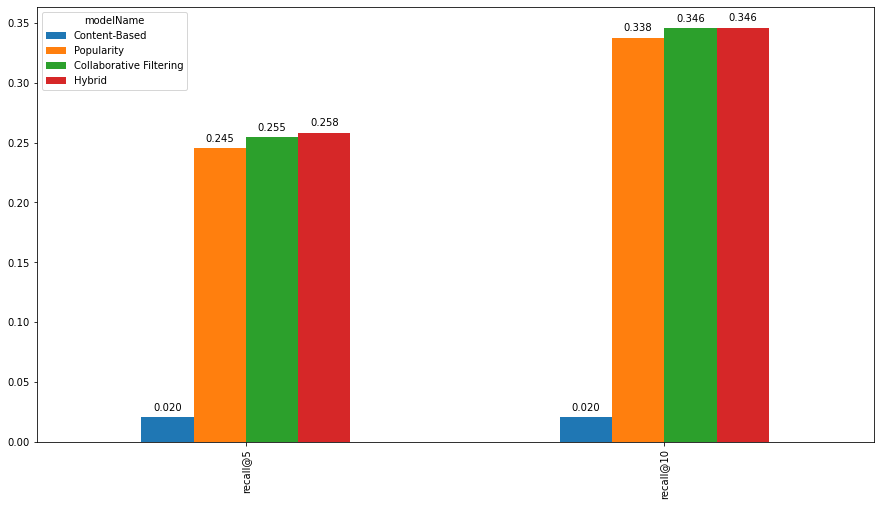

In [253]:
%matplotlib inline
ax = global_metrics_df.transpose().plot(kind='bar', figsize=(15,8))
for p in ax.patches:
    ax.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

## **Conclusion and Recommendations:** 

- **Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
We tried multiple techiques. Selecting top 10 most popular songs will always give results, since it doesn't require targeted user interaction. More personilized method of similiarity based colaborative filtering was useful to suggest songs to existing users tha thave listened to some songs. SVd model on the pther hand didn't show good performance. Similarly clustering model didn't work well.It only created 2 cluster, where most of the users ende dup in 1 cluster. Content based recomendaiton system isn't the best for the data set we have. Given we only have song title and atist name it will more likely recommend songs of the same artist or from the same realse. Including song lyrics would help to recommend songs with similar lyrical content.
- **Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?
We should adopt hybrid model as our final solution. Based on recall numbers we can tell that that model is slightly better than collaborative filtering but combined with content-based filtering can overcome some of the shortcomings of collaborative filtering model. And with providing additional text data about songs, like lyrics, genre etc. could potentially improve recall of hybrid model as well. This model would be combined with popularity model and used for new users or existing users who had no interactions. This is how we can solve the cold start problem.
- **Key recommendations for implementation -** What are some key recommendations to implement the solutions? What should the implementation roadmap look like? What further analysis needs to be done or what other associated problems need to be solved?
To suscessfully implement this solution we would have to provide some additional data about songs, so that we can improve performance of more complex models. Cleaning data and replacing year 0 with valid values would be needed as well for better perofromance. Once we build these recommendation systems, we can use A/B Testing to measure the effectiveness of these systems.Based on the results of these test we would decide if the model is useful and can be rolled out to all users.